# **Análisis de datos de los resultados Prueba Saber Pro 2023**

El objetivo de este proyecto es realizar un análisis que permita identificar el comportamiento de los resultados de las pruebas saber pro para el año 2023. Se emplean herramientas y paquetes para el análisis de datos como Pandas, numpy, Matplotlib y Seaborn.

## Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Datos

Se monta el modulo de drive para leer el archivo.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
ruta_data = '/content/drive/MyDrive/data_icfes_saber_pro_2023.TXT'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


La base de datos utilizada, se encuentra disponible en el portal del [Instituto Colombiano para la Evaluación de la Educación](https://www.icfes.gov.co/resultados). El archivo se guardó en [google drive](https://drive.google.com/file/d/1pRp3mhiz21abn9pamllVFlSc9Yx-vm0I/view?usp=sharing), y
cuenta con 100 variables, dentro de las que vale la pena mencionar el genero del o la estudiante, el municipio y departamento de residencia, así como el municipio y departamento de presentación del examen. Además, otras variables como el caracter y origen de las instituciones de educación superior en las que estudia cada uno de los que presenta la prueba, y logicamente los resultados individuales para cada prueba de cada uno de los estudiantes, sus niveles de desempeño, los percentiles correspondientes al nivel nacional y a su propio nucleo basico del conocimiento.

In [3]:
df_saber_pro = pd.read_table(ruta_data, sep='¬')

<ipython-input-3-c8e8c3eb2e0c>:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df_saber_pro = pd.read_table(ruta_data, sep='¬')


In [4]:
df_saber_pro

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,TI,COLOMBIA,F,03/01/2001,NO,20231,EK202310108228,ESTUDIANTE,COLOMBIA,ATLANTICO,...,2.0,28,30,148,60.0,70.0,61.403944,4.0,3,PUBLICAR
1,CC,COLOMBIA,M,14/06/2002,NO,20231,EK202310146951,ESTUDIANTE,COLOMBIA,ATLANTICO,...,2.0,36,38,120,15.0,13.0,53.902622,2.0,3,PUBLICAR
2,CC,COLOMBIA,F,22/05/2002,NO,20231,EK202310146844,ESTUDIANTE,COLOMBIA,ATLANTICO,...,2.0,52,54,146,57.0,53.0,65.881886,4.0,3,PUBLICAR
3,CC,COLOMBIA,F,02/06/2001,NO,20231,EK202310165034,ESTUDIANTE,COLOMBIA,ATLANTICO,...,3.0,69,63,136,40.0,33.0,71.978823,4.0,3,PUBLICAR
4,CC,COLOMBIA,M,04/01/2002,NO,20231,EK202310155253,ESTUDIANTE,COLOMBIA,ATLANTICO,...,3.0,87,82,155,70.0,63.0,67.067764,4.0,3,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139283,CC,COLOMBIA,F,19/10/2001,NO,20231,EK202310236326,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,...,2.0,16,17,133,35.0,41.0,59.912471,4.0,2,PUBLICAR
139284,CC,COLOMBIA,M,25/01/1999,NO,20231,EK202310228645,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,...,3.0,86,88,134,36.0,45.0,56.499579,3.0,2,PUBLICAR
139285,CC,COLOMBIA,M,24/01/1996,NO,20231,EK202310115566,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,...,1.0,9,10,106,4.0,4.0,58.080184,3.0,3,PUBLICAR
139286,CC,COLOMBIA,M,30/03/2001,NO,20231,EK202310111780,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,...,2.0,31,33,119,14.0,17.0,60.075855,4.0,3,PUBLICAR


## Explorando los datos

In [7]:
# El df cuenta con las siguientes observaciones y variables.
print(df_saber_pro.shape)

(139288, 100)


In [8]:
# Las 100 variables, o columnas, del df son:
df_saber_pro.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'ESTU_EXTERIOR', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_AREARESIDE', 'ESTU_ESTADOCIVIL', 'ESTU_TITULOOBTENIDOBACHILLER',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES',
       'ESTU_PAGOMATRICULAPROPIO', 'ESTU_COMOCAPACITOEXAMENSB11',
       'ESTU_CURSODOCENTESIES', 'ESTU_CURSOIESAPOYOEXTERNO',
       'ESTU_CURSOIESEXTERNA', 'ESTU_SIMULACROTIPOICFES',
       'ESTU_ACTIVIDADREFUERZOAREAS', 'ESTU_ACTIVIDADREFUERZOGENERIC',
       'ESTU_TIPODOCUMENTOSB11', 'ESTU_SEMESTRECURSA', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'FAMI_OCUPACIONPADRE', 'FAMI_OCUPACIONMADRE',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TI

In [9]:
# Primeras cinco observaciones del df
df_saber_pro.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,TI,COLOMBIA,F,03/01/2001,NO,20231,EK202310108228,ESTUDIANTE,COLOMBIA,ATLANTICO,...,2.0,28,30,148,60.0,70.0,61.403944,4.0,3,PUBLICAR
1,CC,COLOMBIA,M,14/06/2002,NO,20231,EK202310146951,ESTUDIANTE,COLOMBIA,ATLANTICO,...,2.0,36,38,120,15.0,13.0,53.902622,2.0,3,PUBLICAR
2,CC,COLOMBIA,F,22/05/2002,NO,20231,EK202310146844,ESTUDIANTE,COLOMBIA,ATLANTICO,...,2.0,52,54,146,57.0,53.0,65.881886,4.0,3,PUBLICAR
3,CC,COLOMBIA,F,02/06/2001,NO,20231,EK202310165034,ESTUDIANTE,COLOMBIA,ATLANTICO,...,3.0,69,63,136,40.0,33.0,71.978823,4.0,3,PUBLICAR
4,CC,COLOMBIA,M,04/01/2002,NO,20231,EK202310155253,ESTUDIANTE,COLOMBIA,ATLANTICO,...,3.0,87,82,155,70.0,63.0,67.067764,4.0,3,PUBLICAR


In [10]:
# Últimas cinco observaciones del df
df_saber_pro.tail()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
139283,CC,COLOMBIA,F,19/10/2001,NO,20231,EK202310236326,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,...,2.0,16,17,133,35.0,41.0,59.912471,4.0,2,PUBLICAR
139284,CC,COLOMBIA,M,25/01/1999,NO,20231,EK202310228645,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,...,3.0,86,88,134,36.0,45.0,56.499579,3.0,2,PUBLICAR
139285,CC,COLOMBIA,M,24/01/1996,NO,20231,EK202310115566,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,...,1.0,9,10,106,4.0,4.0,58.080184,3.0,3,PUBLICAR
139286,CC,COLOMBIA,M,30/03/2001,NO,20231,EK202310111780,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,...,2.0,31,33,119,14.0,17.0,60.075855,4.0,3,PUBLICAR
139287,CC,COLOMBIA,F,15/07/1999,NO,20231,EK202310174486,ESTUDIANTE,COLOMBIA,BOGOTÁ,...,2.0,44,47,132,34.0,41.0,64.993802,4.0,2,PUBLICAR


In [13]:
# Dada la cantidad de filas y columnas, no es posible visualizar el dataframe
# completo. Pasando el argumento de longitud a la función head, el resultado
# es la vista de las 5 primeras y últimas observaciones, y de las 10 primeras
# y últimas variables.
df_saber_pro.head(len(df_saber_pro))

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,TI,COLOMBIA,F,03/01/2001,NO,20231,EK202310108228,ESTUDIANTE,COLOMBIA,ATLANTICO,...,2.0,28,30,148,60.0,70.0,61.403944,4.0,3,PUBLICAR
1,CC,COLOMBIA,M,14/06/2002,NO,20231,EK202310146951,ESTUDIANTE,COLOMBIA,ATLANTICO,...,2.0,36,38,120,15.0,13.0,53.902622,2.0,3,PUBLICAR
2,CC,COLOMBIA,F,22/05/2002,NO,20231,EK202310146844,ESTUDIANTE,COLOMBIA,ATLANTICO,...,2.0,52,54,146,57.0,53.0,65.881886,4.0,3,PUBLICAR
3,CC,COLOMBIA,F,02/06/2001,NO,20231,EK202310165034,ESTUDIANTE,COLOMBIA,ATLANTICO,...,3.0,69,63,136,40.0,33.0,71.978823,4.0,3,PUBLICAR
4,CC,COLOMBIA,M,04/01/2002,NO,20231,EK202310155253,ESTUDIANTE,COLOMBIA,ATLANTICO,...,3.0,87,82,155,70.0,63.0,67.067764,4.0,3,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139283,CC,COLOMBIA,F,19/10/2001,NO,20231,EK202310236326,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,...,2.0,16,17,133,35.0,41.0,59.912471,4.0,2,PUBLICAR
139284,CC,COLOMBIA,M,25/01/1999,NO,20231,EK202310228645,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,...,3.0,86,88,134,36.0,45.0,56.499579,3.0,2,PUBLICAR
139285,CC,COLOMBIA,M,24/01/1996,NO,20231,EK202310115566,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,...,1.0,9,10,106,4.0,4.0,58.080184,3.0,3,PUBLICAR
139286,CC,COLOMBIA,M,30/03/2001,NO,20231,EK202310111780,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,...,2.0,31,33,119,14.0,17.0,60.075855,4.0,3,PUBLICAR


In [14]:
# Los valores NA existentes en variables como las relacionadas con la
# preparación previa a la prueba no es posible imputarlos ya que
# no son propiamente datso faltantes, sino que una opción de respuesta
# era NA.
df_saber_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139288 entries, 0 to 139287
Data columns (total 100 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ESTU_TIPODOCUMENTO              139288 non-null  object 
 1   ESTU_NACIONALIDAD               139288 non-null  object 
 2   ESTU_GENERO                     139288 non-null  object 
 3   ESTU_FECHANACIMIENTO            139288 non-null  object 
 4   ESTU_EXTERIOR                   139288 non-null  object 
 5   PERIODO                         139288 non-null  int64  
 6   ESTU_CONSECUTIVO                139288 non-null  object 
 7   ESTU_ESTUDIANTE                 139288 non-null  object 
 8   ESTU_PAIS_RESIDE                139288 non-null  object 
 9   ESTU_DEPTO_RESIDE               139288 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO           139288 non-null  int64  
 11  ESTU_MCPIO_RESIDE               139288 non-null  object 
 12  ESTU_COD_RESIDE

In [15]:
# Distribución de las variables numéricas. De las 100 columnas, 34 son de tipo
# numérico (int64), por lo que son susceptibles de resumir estadisticamente.
df_saber_pro.describe()

,PERIODO,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,INST_COD_INSTITUCION,ESTU_SNIES_PRGMACADEMICO,ESTU_PRGM_CODMUNICIPIO,ESTU_INST_CODMUNICIPIO,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,...,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES
count,139288.000000,139288.000000,139288.000000,139288.000000,139288.000000,139288.000000,139288.000000,139288.000000,139288.000000,139288.000000,...,139288.000000,135808.000000,139288.000000,139288.000000,139288.000000,139198.000000,139198.000000,134393.000000,134393.000000,139288.000000
mean,20231.015026,150.138375,29796.776004,2533.553687,51292.862888,24270.476416,22962.078219,29325.569080,29.233473,141.168636,...,143.225705,2.421617,49.422527,49.402791,143.670912,50.391284,50.339416,55.013817,2.676337,2.527174
std,0.121658,3469.895432,25776.026591,1626.323468,44824.958976,23484.347141,22812.720625,25606.156794,25.588823,31.439579,...,34.540394,0.727970,29.569127,29.571062,23.436672,28.958658,28.956915,9.226523,1.111551,0.757203
min,20231.000000,0.000000,2.000000,1101.000000,1.000000,5001.000000,5001.000000,5001.000000,5.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,20.235238,1.000000,1.000000
25%,20231.000000,11.000000,11001.000000,1301.000000,4114.000000,11001.000000,11001.000000,11001.000000,11.000000,118.000000,...,127.000000,2.000000,24.000000,24.000000,127.000000,25.000000,25.000000,48.684735,2.000000,2.000000
50%,20231.000000,15.000000,15759.000000,2102.000000,52543.000000,11001.000000,11001.000000,15001.000000,15.000000,140.000000,...,147.000000,2.000000,49.000000,49.000000,142.000000,50.000000,50.000000,55.275513,2.000000,2.000000
75%,20231.000000,52.000000,52001.000000,2829.000000,102854.000000,27001.000000,23001.000000,52001.000000,52.000000,163.000000,...,163.000000,3.000000,75.000000,75.000000,159.000000,75.000000,75.000000,61.508539,4.000000,3.000000
max,20232.000000,99999.000000,99999.000000,9931.000000,111317.000000,95001.000000,86001.000000,99001.000000,99.000000,300.000000,...,300.000000,4.000000,100.000000,100.000000,261.000000,100.000000,100.000000,87.275103,4.000000,4.000000


In [22]:
# Se seleccionan algunas variables relevantes para el análisis descriptivo.
df_filter = df_saber_pro[['ESTU_GENERO', 'FAMI_ESTRATOVIVIENDA',
                          'INST_NOMBRE_INSTITUCION', 'ESTU_PRGM_ACADEMICO',
                          'GRUPOREFERENCIA', 'INST_ORIGEN',
                          'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_RAZONA_CUANTITAT_DESEM',
                          'MOD_RAZONA_CUANTITATIVO_PNAL', 'MOD_RAZONA_CUANTITATIVO_PNBC',
                          'MOD_LECTURA_CRITICA_PUNT', 'MOD_LECTURA_CRITICA_DESEM',
                          'MOD_LECTURA_CRITICA_PNAL', 'MOD_LECTURA_CRITICA_PNBC',
                          'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_COMPETEN_CIUDADA_DESEM',
                          'MOD_COMPETEN_CIUDADA_PNAL', 'MOD_COMPETEN_CIUDADA_PNBC',
                          'MOD_INGLES_PUNT', 'MOD_INGLES_DESEM', 'MOD_INGLES_PNAL',
                          'MOD_INGLES_PNBC', 'MOD_COMUNI_ESCRITA_PUNT',
                          'MOD_COMUNI_ESCRITA_DESEM', 'MOD_COMUNI_ESCRITA_PNAL',
                          'MOD_COMUNI_ESCRITA_PNBC', 'PUNT_GLOBAL', 'PERCENTIL_GLOBAL',
                          'PERCENTIL_NBC']]

In [23]:
df_filter

,ESTU_GENERO,FAMI_ESTRATOVIVIENDA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,GRUPOREFERENCIA,INST_ORIGEN,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITAT_DESEM,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,...,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC
0,F,Estrato 2,FUNDACION UNIVERSITARIA-CEIPA-SABANETA,ADMINISTRACION HUMANA,ADMINISTRACIÓN Y AFINES,NO OFICIAL - FUNDACIÓN,137,2,47,54,...,A2,57.0,65.0,130,2.0,28,30,148,60.0,70.0
1,M,Estrato 1,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,INGENIERIA INDUSTRIAL,INGENIERÍA,NO OFICIAL - CORPORACIÓN,94,1,6,3,...,A2,21.0,17.0,138,2.0,36,38,120,15.0,13.0
2,F,Estrato 2,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,INGENIERIA INDUSTRIAL,INGENIERÍA,NO OFICIAL - CORPORACIÓN,155,3,67,54,...,A2,41.0,37.0,149,2.0,52,54,146,57.0,53.0
3,F,Estrato 2,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,DERECHO,DERECHO,NO OFICIAL - CORPORACIÓN,135,2,45,51,...,A2,28.0,30.0,159,3.0,69,63,136,40.0,33.0
4,M,Estrato 3,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,DERECHO,DERECHO,NO OFICIAL - CORPORACIÓN,136,2,45,52,...,B1,78.0,79.0,171,3.0,87,82,155,70.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139283,F,Estrato 2,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,CONTADURÍA PÚBLICA,CONTADURÍA Y AFINES,NO OFICIAL - CORPORACIÓN,122,1,30,26,...,A2,41.0,53.0,120,2.0,16,17,133,35.0,41.0
139284,M,Estrato 3,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,ADMINISTRACIÓN DE EMPRESAS,GRUPO REFERENCIA NACIONAL UNIVERSITARIO,NO OFICIAL - CORPORACIÓN,126,2,34,40,...,A1,16.0,18.0,171,3.0,86,88,134,36.0,45.0
139285,M,Estrato 3,UNIVERSIDAD ECCI-BOGOTÁ D.C.,INGENIERIA INDUSTRIAL,INGENIERÍA,NO OFICIAL - CORPORACIÓN,98,1,9,5,...,A2,33.0,29.0,114,1.0,9,10,106,4.0,4.0
139286,M,Estrato 3,UNIVERSIDAD ECCI-BOGOTÁ D.C.,MERCADEO Y PUBLICIDAD,"COMUNICACIÓN, PERIODISMO Y PUBLICIDAD",NO OFICIAL - CORPORACIÓN,111,1,18,21,...,A2,67.0,75.0,133,2.0,31,33,119,14.0,17.0


## Análisis Exploratorio

A continuación se presentan algunos elementos de estadística descriptiva de los datos.

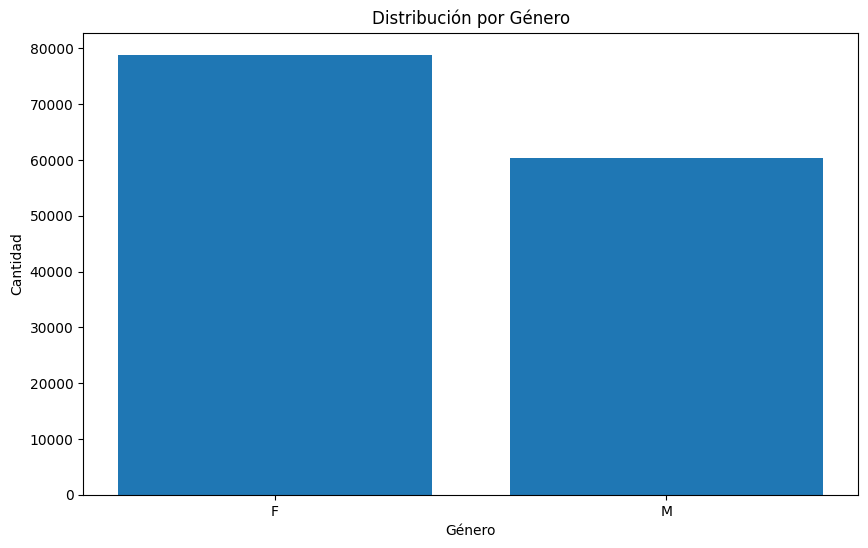

In [48]:
# Distribución de los datos según la variable de Género
df_filter_genero = df_filter[['ESTU_GENERO']]
df_grouped = df_filter_genero.groupby('ESTU_GENERO').size().reset_index(name='counts')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['ESTU_GENERO'], df_grouped['counts'])
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución por Género')
plt.show()


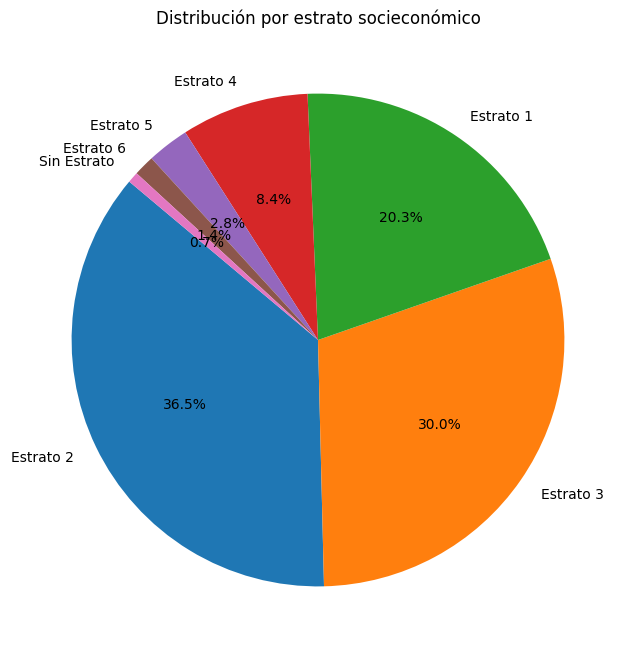

In [68]:
# Distribución por estrato socioeconómico
estrato_clean = df_filter_estrato.dropna(subset=['FAMI_ESTRATOVIVIENDA'])
counts = estrato_clean['FAMI_ESTRATOVIVIENDA'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución por estrato socieconómico')
plt.show()

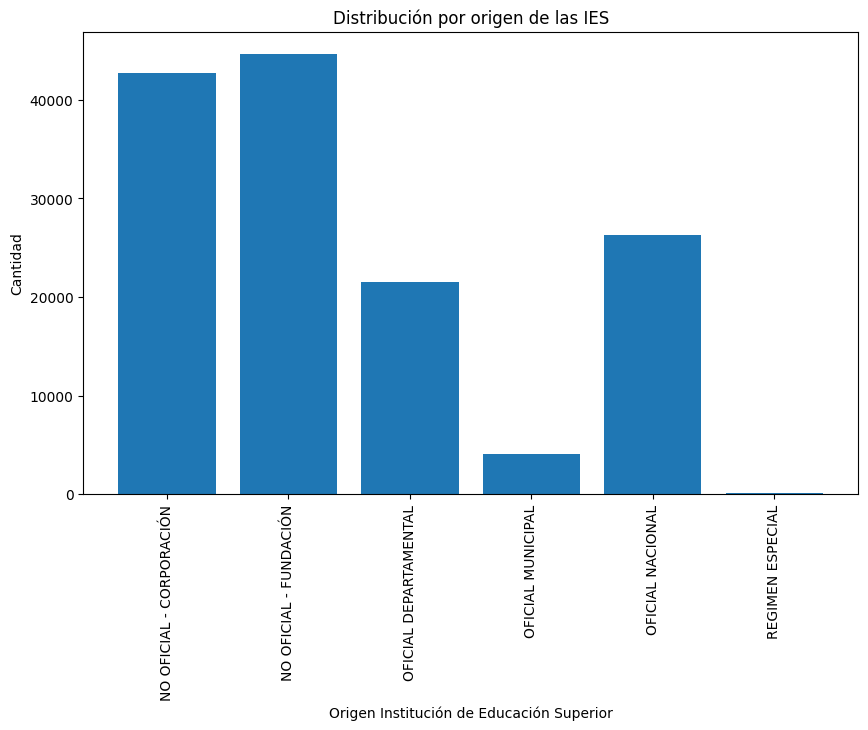

In [57]:
df_filter_caracterins = df_filter[['INST_ORIGEN']]
df_group_caracterins = df_filter_caracterins.groupby('INST_ORIGEN').size().reset_index(name='counts')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_group_caracterins['INST_ORIGEN'], df_group_caracterins['counts'])
plt.xlabel('Origen Institución de Educación Superior')
plt.ylabel('Cantidad')
plt.title('Distribución por origen de las IES')
plt.xticks(rotation=90)
plt.show()

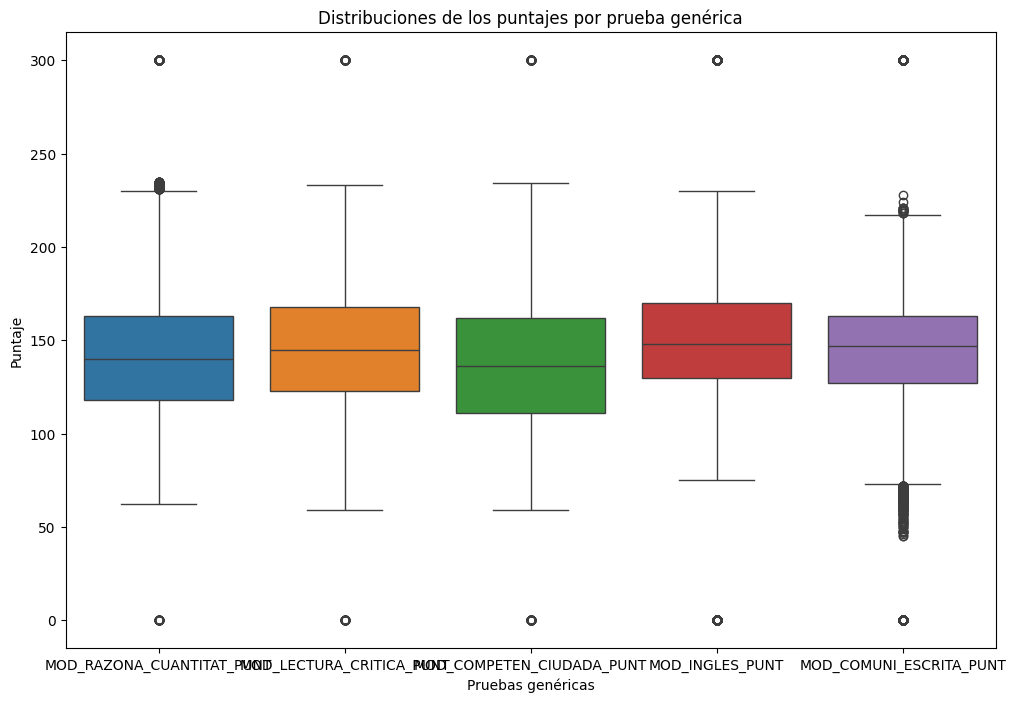

In [63]:
cols = ['MOD_RAZONA_CUANTITAT_PUNT', 'MOD_LECTURA_CRITICA_PUNT',
        'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_INGLES_PUNT', 'MOD_COMUNI_ESCRITA_PUNT']
variables_puntajes = df_filter[cols]

# Crear el gráfico de boxplot usando seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=variables_puntajes)
plt.title('Distribuciones de los puntajes por prueba genérica')
plt.xlabel('Pruebas genéricas')
plt.ylabel('Puntaje')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


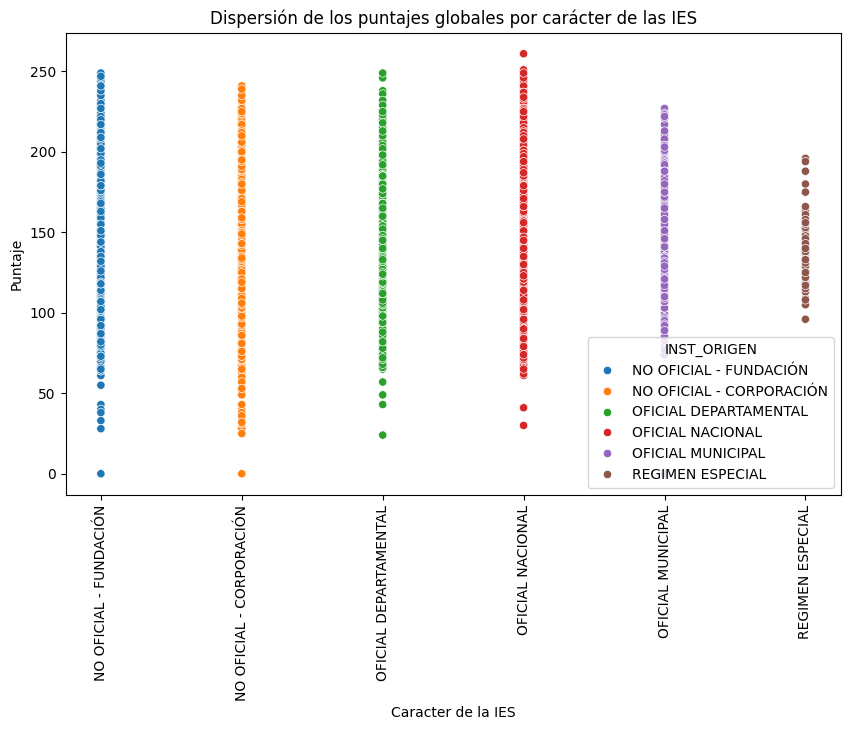

In [67]:
eje_x = 'INST_ORIGEN'
eje_y = 'PUNT_GLOBAL'
categoria = 'INST_ORIGEN'

# Crear el gráfico de dispersión usando seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filter, x=eje_x, y=eje_y, hue=categoria)
plt.title('Dispersión de los puntajes globales por carácter de las IES')
plt.xlabel('Caracter de la IES')
plt.ylabel('Puntaje')
plt.xticks(rotation=90)
plt.show()

# Conclusiones

1. Si comparamos los datos de las bases anonimizadas publicadas por el ICFES, previo a 2023, la tendencia de presentación de la prueba Saber pro se mantiene en cuanto a un mayor número de mujeres.
Para el caso del primero semestre del 2023 (teniendo en cuenta que desde 2022 la prueba se realiza dos veces al año), el número de mujeres fue de 78861, mientras el de hombres fue de 60427.

2. El creciente acceso a la educación superior de las clases sociales menos favorecidas historicamente también es importante mencionarlo, dado que si revisamos el estrato socioeconómico de quienes presentan la prueba, solamente entre los estratos 1, 2 y 3 se suma más del 80% de la población.

3. Pero por otra parte, también es necesario mencionar que un buen número de personas, exactamente 51796, de las que presentan la prueba, están inscritos en universidades o institucines de educación superior de caracter oficial nacional, departamental o municipal, es decir, instituciones públicas. No es menos cierto que las IES de tipo no oficial, ya sean fundaciones o corporaciones, cuentan también con un importante número de estudiantes, siendo que en las IES privadas presentaron la prueba un total de 87377 personas.

4. Las distribuciones de los puntajes por cada una de las pruebas evidencia una cierta uniformidad en cuanto a las medidas de tendencia central, especialmente la media. Sin embargo, los rangos intercuatilicos muestran también que las distribuciones de las pruebas de competencias ciudadanas y razonamiento cuantitativo, son mayores en comparación al rango intercuartilico de la prueba de inglés y comunicación escrita. Para el caso de esta ultima prueba, la distribución también permite identificar una alta cantidad de valores cercanos a outliers, dado que la mayoría de los puntajes estan centrados en torno a la media, y que hay puntajes muy bajos, por fuera del primer cuartil. En suma, la prueba de comunicación escrita es la que presenta unos resultados mucho más dispersos en cuanto a valores atipicos, a pesar de que la mayoría se centra cerca a la media teorica, y es la prueba que requiere mayor atención en cuanto a las posibilidades y planes de mejoramiento.

5. Un diagrama de dispersión de los puntajes globales obtenidos de acuerdo al caracter de las IES, permite establecer que las instituciones de caracter oficial tienen una dispersión menor, ya que en la escala de 0 a 300, dichos puntajes inician en un punto más alto, se concentran hacia la media teórica (150) y se extienden hasta el 250, siendo estos ultimos valores si bien no atipicos, si bastante altos en comparación con los demás. Para el caso de las IES privadas del país, los puntajes globales están más dispersos, ya que inician en una escala mucho más baja y se extienden igualmente hacia el 250 con algunos casos de puntajes superiores. Las IES de caracter regimen especial, son interesantes para el análisis, ya que si bien no representan una muestra significativa dentro de la población total que presenta el examen en todo el país, sus resultados son bastante compactos en cuanto a la dispersión de los puntajes globales, iniciando en un escala cercana a los 100 puntos y extendiendose hasta los 200, es decir, una concentración bastante importante en torno a la media teórica.